In [3]:
pip install matplotlib

  Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 419.4 kB/s eta 0:00:05
   --------- ------------------------------ 0.5/2.3 MB 419.4 kB/s eta 0:00:05
   ------------- --------

In [8]:
pip install pycocotools

Note: you may need to restart the kernel to use updated packages.


loading annotations into memory...
Done (t=2.16s)
creating index...
index created!
Found 5000 images in COCO annotations.
Found 4952 images with annotations.


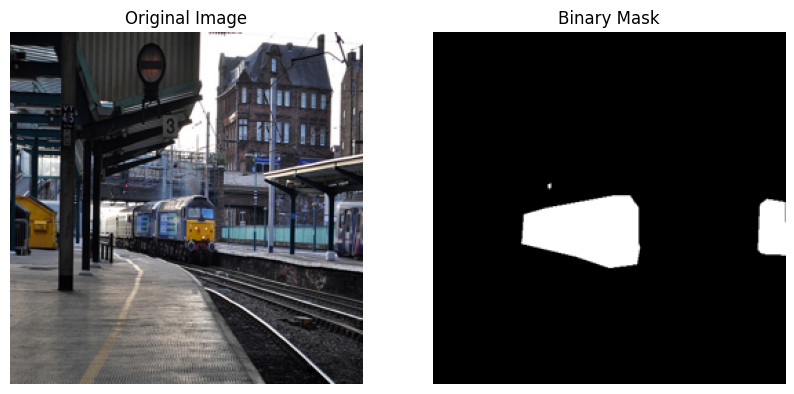

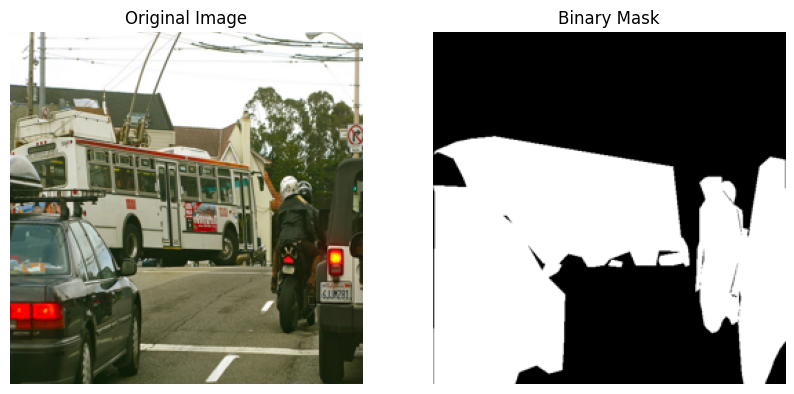

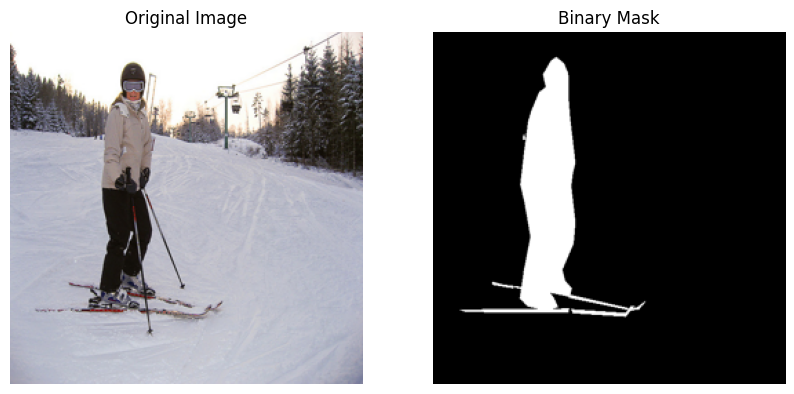

In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import random
%matplotlib inline
images_folder = r"C:\Users\ilaki\Desktop\VISON_AI\coco2017\val2017"
annotations_path = r"C:\Users\ilaki\Desktop\VISON_AI\coco2017\annotations\instances_val2017.json"
binary_masks_folder = r"C:\Users\ilaki\Desktop\VISON_AI\coco2017\BinaryMasks"

os.makedirs(binary_masks_folder, exist_ok=True)
target_size = (256, 256)

coco = COCO(annotations_path)
all_img_ids = coco.getImgIds()
print(f"Found {len(all_img_ids)} images in COCO annotations.")
images_with_masks = []
for img_id in all_img_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_name = img_info['file_name']
    ann_ids = coco.getAnnIds(imgIds=img_id)
    if len(ann_ids) == 0:
        continue  # skip images with no annotations
    images_with_masks.append((img_id, img_name))

print(f"Found {len(images_with_masks)} images with annotations.")

# Generate binary masks from annotations
for img_id, img_name in images_with_masks:
    img_info = coco.loadImgs(img_id)[0]
    height, width = img_info['height'], img_info['width']

    mask = np.zeros((height, width), dtype=np.uint8)

    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    for ann in anns:
        ann_mask = coco.annToMask(ann)
        mask = np.maximum(mask, ann_mask)  # combine masks

    mask_img = Image.fromarray(mask * 255).resize(target_size)
    
    save_path = os.path.join(binary_masks_folder, img_name.replace('.jpg', '_binary.png'))
    mask_img.save(save_path)

samples = random.sample(images_with_masks, 3)
for img_id, img_name in samples:
    img_path = os.path.join(images_folder, img_name)
    binary_mask_path = os.path.join(binary_masks_folder, img_name.replace('.jpg', '_binary.png'))
    image = Image.open(img_path).resize(target_size)
    binary_mask = Image.open(binary_mask_path)
    
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis('off')
    
    ax[1].imshow(binary_mask, cmap='gray')
    ax[1].set_title("Binary Mask")
    ax[1].axis('off')
    
    plt.show()
